[Источник](https://courses.cs.ut.ee/MTAT.03.227/2015_spring/uploads/Main/home-exercises-5.pdf)

# Одномерная деревня

##### Выполнил: Игорь Соколов

##### Баллов:   /50

Далее речь пойдет о полностью вымышленном мире, в котором возможны одномерные деревни и прочие привратности судьбы.
Пусть у нас есть одномерная деревня, в которой $N$ домов располагаются на отрезке от $0$ до $l$ км.

In [24]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

Для Вашего удобства ниже написана функция, которая рисует небольшую одномерную деревню.

In [25]:
def plot_village(coordinates, l=1):
    # Checking, that all the coordinates are less than l
    assert (coordinates <= l).all(), 'All the houses should be in a village'
    
    # Draw horizontal line
    plt.hlines(0, 0, l)
    plt.xlim(0, l)
    plt.ylim(-0.5, 0.5)
    
    # Draw house points
    y = np.zeros(np.shape(coordinates))
    plt.title('The Hobbit Village')
    plt.plot(coordinates,y,'o',ms = 10)
    plt.axis('off')
    plt.xlabel('Coordinates')
    fig = plt.gcf()
    fig.set_size_inches(15, 1)
    plt.show()

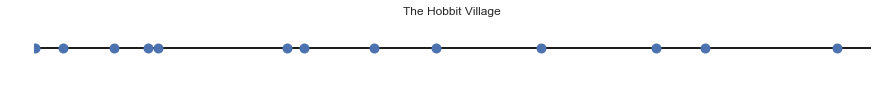

In [26]:
N = 13
l = 1
x = np.random.rand(N)*l
    
plot_village(x, l)

Жители одномерной деревни хотят подключиться к интернету, для этого им необходимо поставить центральную обслуживающую станцию, от которой кабель будет тянуться ко всем домам деревни. Пусть цена кабеля, который надо тянуть от станции до каждого дома независимо, определяется некоторой функцией $p(d)$. Тогда ясно, что деревне придется заплатить следующую сумму за доступ в мировую паутину:
$$
P(w, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p(|w - x_i|)
$$
Здесь $w$ - координата станции, $x_i$ - координата i-ого домика.

## Задача 1 (1)
Найдите аналитически оптимальную позицию $w^*$, доставляющую минимум функции $P(w, x)$ при условии, что $p(d) = d^2$

$P(w, x) = \sum\limits_{i=1}^N (w - x_i)^2$
 
$\frac{d}{dw} P(w, x) = 2\sum\limits_{i=1}^N (w - x_i), \;\;\;$
 
Условие оптимальности $w^*$:

$\frac{d}{dw} P(w, x) \bigg|_{w = w^*} = 0 \;\; $
 
$\Rightarrow \;\; w^* = \dfrac{\sum\limits_{i=1}^N x_i}{N}$

## Задача 2 (2)
Напишите функцию `P`, которая берет на вход позицию станции $w$ и вектор координат $x$ и возвращает значение функции потерь $P$.

In [41]:
def P(w, x):
    return np.sum((w-x)**2)

Постройте значение функции потерь для значения координат от $0$ до $l$.

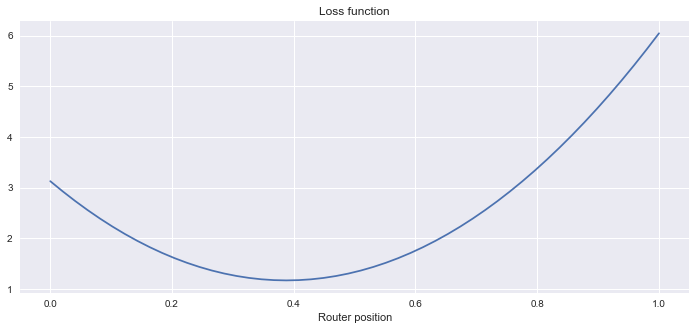

In [28]:
w = np.linspace(0,l)
p = [P(w_i, x) for w_i in w]
plt.title('Loss function')
plt.xlabel('Router position')
plt.plot(w,p)
fig = plt.gcf()
fig.set_size_inches(12, 5)

## Задача 3 (2)
Напишите функцию `dP`, которая берет на вход позицию станции $w$ и вектор координат $x$ и возвращает значение градиента функции потерь $\nabla P$ как функции от $w$.

In [39]:
def dP(w, x):
    return 2*np.sum(w - x)

Постройте значение функции `dP` для значения координат от $0$ до $l$. Какая точка на графике представляет особый интерес? Почему?

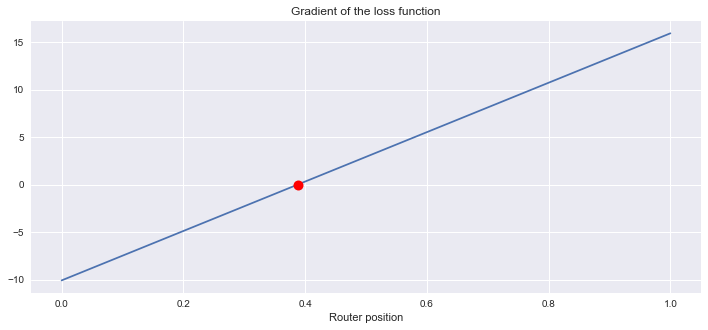

In [40]:
w = np.linspace(0,l)
dp = [dP(w_i, x) for w_i in w]
plt.title('Gradient of the loss function')
plt.xlabel('Router position')
plt.plot(w,dp)
plt.plot([np.sum(x)/len(x)],[0], 'o',ms = 10, color='red')
fig = plt.gcf()
fig.set_size_inches(12, 5)

_Какая точка на графике представляет особый интерес? Почему?_

__Ответ:__ Та, в которой значение градиента функции потерь = 0. Соответствует минимуму функции потерь. (Помечена красным на графике)

## Задача 4 (2)
Напишите функцию `gradient_descent`, которая возвращает значение $w_k$ через фиксированное число шагов. Длина функции не должна превышать 5 строчек кода.

$$
w_{k+1} = w_k - \mu \nabla P(w_k)
$$

In [31]:
def gradient_descent(P, dP, w0, mu, Nsteps):
    w = w0
    for i in range(Nsteps):
        w -= mu*dP(w, x)
    return w

## Задача 5 (2)
Модифицируйте функцию `gradient_descent` так, чтобы она возвращала всю траекторию оптимизации (все значения $w_k$). Постройте графики $P(w_k ,x)$ для $\mu = 0.01, 0.1, 0.15, 0.19, 0.20, 0.21$ . Сделайте выводы.

In [68]:
def gradient_descent(P, dP, w0, args=(),mu=0.01, Nsteps=10):
    w_ar = np.zeros (Nsteps)
    w_ar[0] = w0
    w = w0
    for i in range(1,Nsteps):
        w = w - mu*dP(w, *args)
        w_ar[i] = w
    return w_ar

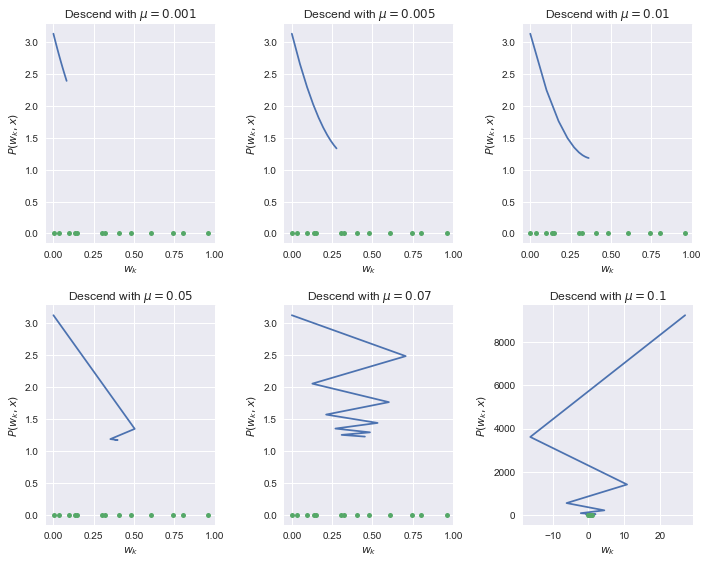

In [69]:
#mus = [0.01, 0.1, 0.15, 0.19, 0.20, 0.21]
mus = [0.001, 0.005, 0.01, 0.05, 0.07, 0.1]
ncols = 3
nrows = (len(mus)-1)//ncols + 1
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 8))
ax = axes.flatten()

for i, mu in enumerate(mus):
    ws = gradient_descent(P, dP, w0=0, args=(x,), mu=mu, Nsteps=10)

    p = [P(w_i, x) for w_i in ws]
    ax[i].plot(ws, p)
    #"ax[i].legend(prop={'size': 10})
    ax[i].set_title(r'Descend with $\mu = %g$' % (mu))
    ax[i].plot(x, np.zeros_like(x), 'o', ms = 5)
    ax[i].set_xlabel(r'$w_k$')
    ax[i].set_ylabel(r'$P(w_k, x)$')
fig.tight_layout()
plt.show()






Изменил начальные значения mus, по которым удобнее судить.

__Выводы:__ при небольшом шаге медленнее сходимся к минимуму. При большом - вначале сходимся быстрее, но при достижении некоторой окрестности минимума - расходимся (также возможны колебания в окрестности минимума). 



## Задача 6 (2)
Напишите функцию `ddP`, которая берет на вход позицию станции $w$ и вектор координат $x$ и возвращает значение гессиана функции потерь $\nabla^2 P$ как функции от $w$.

In [73]:
def ddP(w, x):
    return 2*len(x)

Постройте значение функции `ddP` для значения координат от $0$ до $l$.

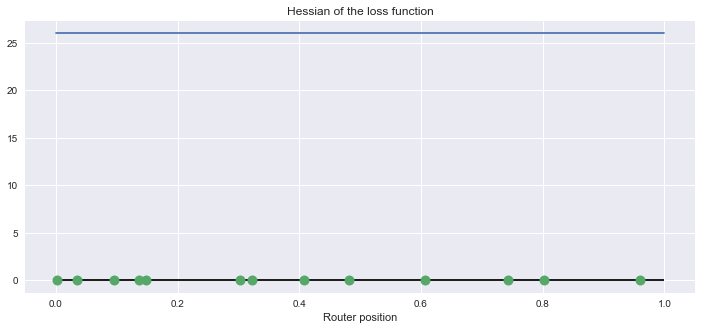

In [74]:
w = np.linspace(0,l)
ddp = [ddP(w_i, x) for w_i in w]
plt.title('Hessian of the loss function')
plt.xlabel('Router position')
plt.plot(w,ddp)
plt.plot(x,np.zeros_like(x),'o',ms = 10)
plt.hlines(0, 0, l)
fig = plt.gcf()
fig.set_size_inches(12, 5)
plt.show()

## Задача 7 (3)
Напишите функцию `newton_descent`, которая возвращает всю оптимизационную траекторию $(w_k)$ через фиксированное число шагов.

In [76]:
def newton_descent(P, dP, ddP, w0,args=(), Nsteps=10):
    w_ar = np.zeros (Nsteps)
    w_ar[0] = w0
    w = w0
    for i in range(1,Nsteps):
        w = w - dP(w, *args)/ddP(w, *args)
        w_ar[i] = w
    return w_ar 

Сравните траекторию метода с траекторией градиентного спуска. Исследуйте поведение метода Ньютона в зависимости от разной стартовой точки $w_0$.

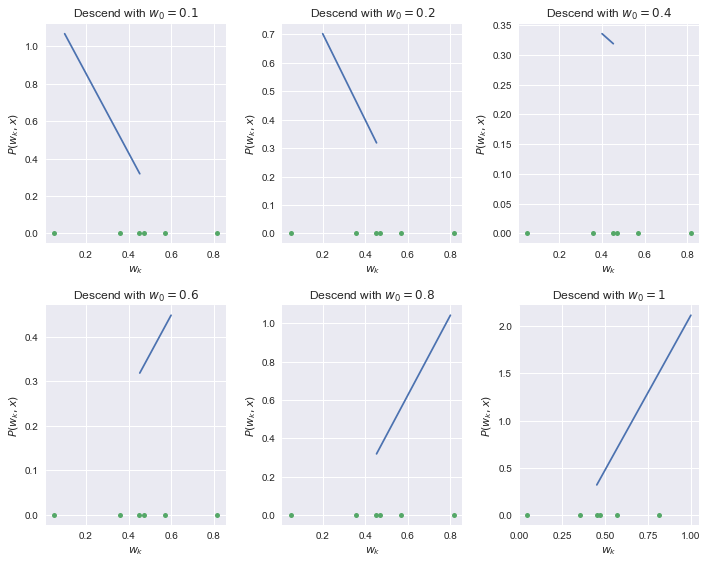

In [94]:
w0s = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
ncols = 3
nrows = (len(w0s)-1)//ncols + 1
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 8))
ax = axes.flatten()

for i, w0 in enumerate(w0s):
    ws = newton_descent(P, dP, ddP, w0=w0, args=(x,), Nsteps=10)

    p = [P(w_i, x) for w_i in ws]
    ax[i].plot(ws, p)
    #"ax[i].legend(prop={'size': 10})
    ax[i].set_title(r'Descend with $w_0 = %g$' % (w0))
    ax[i].plot(x, np.zeros_like(x), 'o', ms = 5)
    ax[i].set_xlabel(r'$w_k$')
    ax[i].set_ylabel(r'$P(w_k, x)$')
fig.tight_layout()
plt.show()

__Исследование__

Так как гессиан постоянен, то в данном случае метод ньютона есть градиентный спуск со скоростью $\mu = \frac{1}{\nabla^2f} = \frac{1}{2N}:\quad x_{k+1} = x_k - \frac{1}{2N}\nabla f$

Рассмотрим теорему 2.3.3 из Жадана стр 38:

_Пусть $f(x)$ - дважды дифферренцируемая сильно выпукая на $\mathbb{R}^n$ функция и выполенено:
$$m||s||^2 \le \langle s,f_{xx}(x)s\rangle \le M||s||^2$$
тогда на каждой итерации в методе градиентного спуска с постоянным шагом выполняется неравенство $$||x_{k+1} - x_*|| \le C(\alpha)||x_k - x_*||$$_

(то есть при выполнении условий имееет место линейная сходимость)

На функция потерь $P(w, x)$ квадратичная и сильно выпукла по $w$.

Также можно подобрать $M = \frac{1}{N}$ и $m = \frac{1}{3N}$, тогда для функции $P(w, x)$ исходная теорема будет верна. 

Отсюда приходим к выходу, что _при любой начальной точке будет иметь место линейная сходимость_.  

Также заметим, что ввиду того что $P$ - квадратичная, то метод Ньютона сойдется за 1 шаг.


Давайте нарисуем оптимальное положение роутера в деревне хоббитцов:

In [83]:
def plot_village_with_internet(coordinates, router_coordinates, l=1):
    # Checking, that all the coordinates are less than l
    assert (np.array(coordinates) <= l).all(), 'All the houses should be in the village'
    assert (np.array(router_coordinates) <= l).all(), 'Router should be in the village'
    
    # Draw horizontal line
    plt.hlines(0, 0, l)
    plt.xlim(0, l)
    plt.ylim(-0.5, 0.5)
    
    # Draw house points
    y = np.zeros(np.shape(coordinates))
    plt.title('Modern Hobbit Village')
    plt.plot(coordinates,y,'o',ms = 10)  
    
    # Draw routers
    y = np.zeros(np.shape(router_coordinates))
    plt.plot(router_coordinates,y,'*',ms = 50)
    plt.axis('off')
    plt.xlabel('Coordinates')
    fig = plt.gcf()
    fig.set_size_inches(15, 1)
    plt.show()

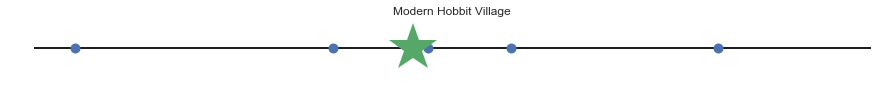

In [82]:
N = 6
l = 1
x = np.random.rand(N)*l

w_ = newton_descent(P, dP, ddP,w0=0,args=(x,), Nsteps=2)[-1]
    
plot_village_with_internet(x, w_, l)

## Задача 8 (3)
Напишите функцию `stochastic_gradient_descent`, которая возвращает всю оптимизационную траекторию $(w_k)$ через фиксированное число шагов по методу стохастического градиентного спуска (градиент считается не по всем домикам деревни хоббитцов, а по случайному подмножеству)

In [125]:
# Stochastic Gradient
def dP_sigma(w, x, p=0.5):
    random_mask = np.random.binomial(1, p, x.shape)
    return 2*np.dot ((w - x), random_mask)

def stochastic_gradient_descent(P, dP_sigma, w0, args=(), mu=0.1, Nsteps=10 ):
    w_ar = np.zeros (Nsteps)
    w_ar[0] = w0
    w = w0
    for i in range(1,Nsteps):
        w = w - mu*dP_sigma(w, *args)
        w_ar[i] = w
    return w_ar


Увеличьте число домиков до $50$, сравните траектории алгоритмов градиентного и стохастического градиентного спуска. Сравните их.

Hint: придется изменить размер шага, чтобы работало:)

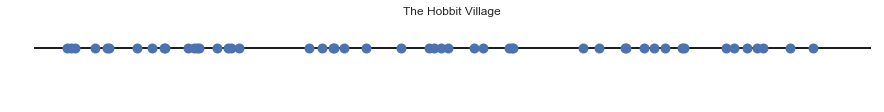

In [124]:
N = 50
l = 1
x = np.random.rand(N)*l
    
plot_village(x, l)

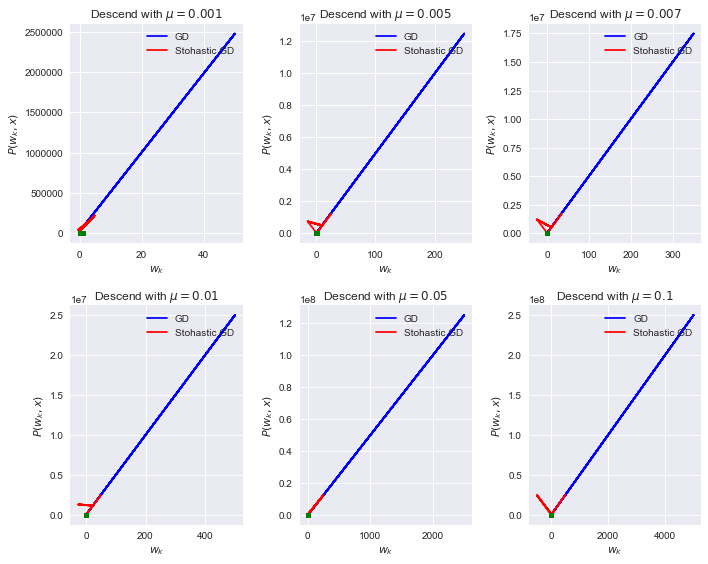

In [147]:
mus = [0.001, 0.005, 0.007, 0.01, 0.05, 0.1]

ncols = 3
nrows = (len(mus)-1)//ncols + 1
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 8))
ax = axes.flatten()

for i, mu in enumerate(mus):
    ws = gradient_descent(P, dP, w0=0, args=(x,), mu=mu, Nsteps=10)
    ps = [P(w_i, x) for w_i in ws]
    
    ws_stoch = stochastic_gradient_descent(P, dP_sigma, w0=0, args=(x,), mu=mu, Nsteps=10)
    ps_stoch = [P(w_i, x) for w_i in ws_stoch]
    ax[i].plot(ws, ps, label='GD', color='blue')
    ax[i].plot(ws_stoch, ps_stoch, label='Stohastic GD', color='red')
    ax[i].plot(x, np.zeros_like(x), 'o', ms = 5, color='green')
    ax[i].hlines(0, 0, l)
    
    ax[i].set_title(r'Descend with $\mu = %g$' % (mu))
    ax[i].set_xlabel(r'$w_k$')
    ax[i].set_ylabel(r'$P(w_k, x)$')
    ax[i].legend(loc = "upper right")
fig.tight_layout()
plt.show()



Только-только жизнь обитателей одномерной деревни наладилась, как роскомнадзор (казалось бы, какое ему дело) сказал, что цена на кабель должна считаться совсем по другой формуле: 
$$
p(d) = |d|
$$

## Задача 9 (3)
Напишите функции `P`, `dP`, `ddP` в новых реалиях. Постройте их для заданного $x$ при различных $w$.

$$
P(w, x) = \sum_{i=1}^{N}|w-x_i|
$$
 
$$
\frac{d}{dw}P(w, x)  = \sum_{i=1}^{N}\textbf{sgn}(w-x_i)
$$
 
$$
\frac{d^2}{dw^2}P(w, x) = 0 \;\;
$$


In [131]:
def P(w, x):
    return np.sum(np.absolute(w - x))

def dP(w, x):    
    return np.sum(np.sign(w - x))

def ddP(w, x):
    return 0

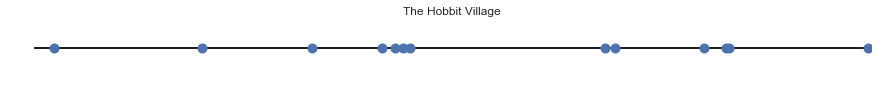

In [132]:
N = 13
l = 1
x = np.random.rand(N)*l
    
plot_village(x, l)

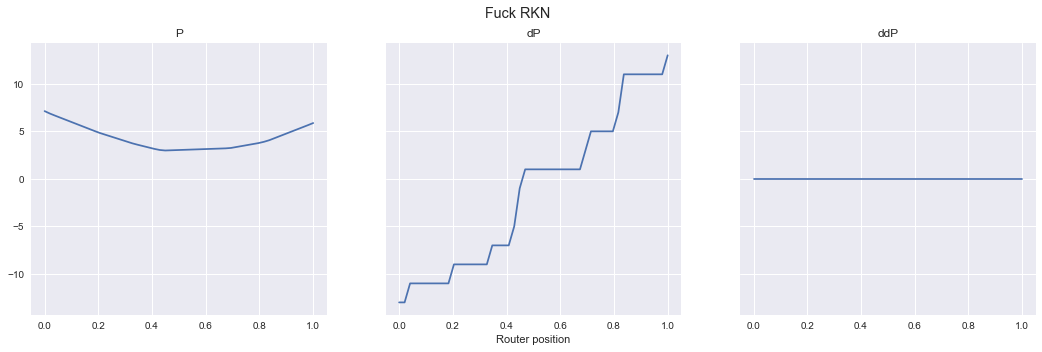

In [138]:
w = np.linspace(0,l)

p = [P(w_i, x) for w_i in w]
dp = [dP(w_i, x) for w_i in w]
ddp = [ddP(w_i, x) for w_i in w]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
ax1.plot(w,p)
ax1.set_title('P')
ax2.plot(w,dp)
ax2.set_title('dP')
ax3.plot(w,ddp)
ax3.set_title('ddP')
ax2.set_xlabel('Router position')
f.set_size_inches(18, 5)
f.suptitle('Fuck RKN')
plt.show()

Найдите оптимальное значение $w^*$ в новых реалиях.

$
\frac{d}{dw}P(w, x) \bigg|_{w=w^*}  = \sum_{i=1}^{N}\textbf{sgn}(w^*-x_i) = \sum_{i=1}^{N} ([w^* > x_i] - [w^* < x_i]) = 0
$

где $$[w^* > x_i] = 
\begin{cases}
1,\quad  w^* > x_i\\ 
0,\quad  w^* \le x_i
\end{cases}$$

$
\sum_{i=1}^{N} [w^* > x_i] = \sum_{i=1}^{N} [w^* < x_i]
$

Приходим к выводу что, что $w^*$ определяется так, что _слева и справа от $w^*$ должно быть одинаковое число домов._

## Задача 10 (2)
Постройте траекторию градиентного спуска в новых реалиях. Что Вы скажете роскомнадзору, когда он потребует решать эту задачу методом Ньютона (потому что они где то слышали, что надо использовать лучшие мировые практики)?

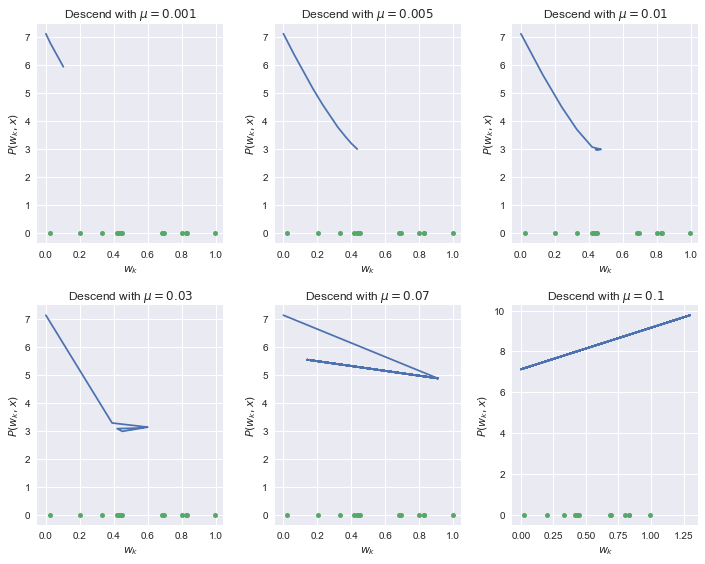

In [135]:
mus = [0.001, 0.005, 0.01, 0.03, 0.07, 0.1]
ncols = 3
nrows = (len(mus)-1)//ncols + 1
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 8))
ax = axes.flatten()

for i, mu in enumerate(mus):
    ws = gradient_descent(P, dP, w0=0, args=(x,), mu=mu, Nsteps=10)

    p = [P(w_i, x) for w_i in ws]
    ax[i].plot(ws, p)
    #"ax[i].legend(prop={'size': 10})
    ax[i].set_title(r'Descend with $\mu = %g$' % (mu))
    ax[i].plot(x, np.zeros_like(x), 'o', ms = 5)
    ax[i].set_xlabel(r'$w_k$')
    ax[i].set_ylabel(r'$P(w_k, x)$')
fig.tight_layout()
plt.show()

_Скажу, что его не получится применить, поскольку гессиан нулевой._

## Задача 11 (3)
Реализуйте функции `dP_sigma`, `stochastic_gradient_descent` в новых реалиях.

In [140]:
def dP_sigma(w, x, p=0.1):
    random_mask = np.random.binomial(1, p, x.shape)
    return np.dot (np.sign(w - x), random_mask)

def stochastic_gradient_descent(P, dP_sigma, w0, args=(), mu=0.1, Nsteps=10 ):
    w_ar = np.zeros (Nsteps)
    w_ar[0] = w0
    w = w0
    for i in range(1,Nsteps):
        w = w - mu*dP_sigma(w, *args)
        w_ar[i] = w
    return w_ar

Постройте траектории градиентного и стохастического градиентного спуска. Поэксперементируйте с уровнем шума в стох. градиенте путем изменения доли домиков, по которым считается градиент ($p$). Проведите эксперименты для большого числа домиков (от $10000$) и сравните результаты.

In [143]:
from functools import partial

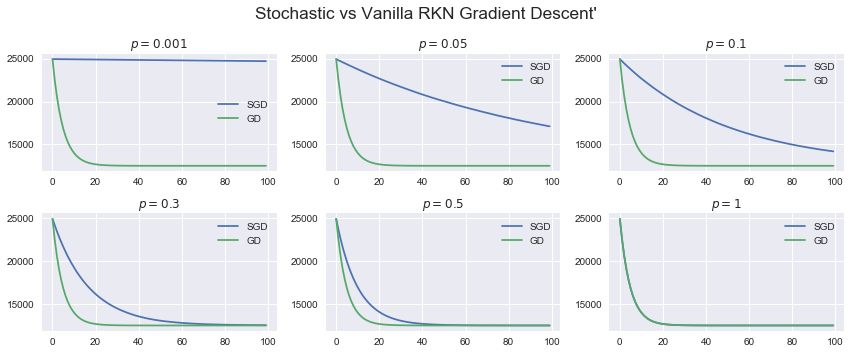

In [159]:
N = 50000
l = 1
x = np.random.rand(N)*l
#mus = [0.001, 0.005, 0.007, 0.01, 0.05, 0.1]
mu = 1e-6
p_s = [0.001, 0.05, 0.1, 0.3, 0.5, 1]

ncols = 3
nrows = (len(mus)-1)//ncols + 1
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 8))
ax = axes.flatten()
fig.suptitle("Stochastic vs Vanilla RKN Gradient Descent'", fontsize="x-large")

for i, p in enumerate(p_s):    
    dP_sigma_new = partial(dP_sigma, p=p)
    list_gr = gradient_descent(P, dP, w0=0,args=(x,), mu=mu, Nsteps=100)
    P_gr =[P(w_, x) for w_ in list_gr]

    list_sgd = stochastic_gradient_descent(P, dP_sigma_new, w0=0,args=(x,), mu=mu, Nsteps=100)
    P_sgd =[P(w_, x) for w_ in list_sgd]
    
    ax[i].set_title(r'$p = %g$' % (p))
    
    ax[i].plot(P_sgd, label='SGD')
    ax[i].plot(P_gr, label='GD')
    ax[i].legend()
    fig.set_size_inches(12, 5)
    
fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.show()

__Анализ:__
_При большем $p$(соответственно и большей выборке домов) быстрее сходимся. При $p=1$ стохастический градиентный спуск совпадает с обычным._

Дела шли своим чередом в деревне хоббитцов. Однако, как и всякое процветающее общество (коим без всяких сомнений себя считали хоббитцы), они решили, что их количество увеличилось достаточно для того, чтобы поставить второй датацетр (роутер) и проводить интернет к каждому дому от ближайшего к нему роутера.
$$
P(w_1, w_2, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p\left(\min\left(\left|w_1 - x_i\right|, \left|w_2 - x_i\right|\right)\right)
$$

## Задача 12 (2)
Напишите функции `P`, `dP` в новых реалиях. Постройте их для заданного $x$ при различных $w_1, w_2$. Помните, что градиент в этом случае представляет собой двумерный вектор.

In [285]:
def P(w1, w2, x):
    return sum(np.min((np.abs(w1 - x), np.abs(w2 - x)), axis=0))

def dP(w1, w2, x):
    y1 = w1-x
    y2 = w2-x

    y1_abs = np.abs(y1)
    y2_abs = np.abs(y2)   
    
    dp_dw1 = np.sum(np.sign(y1[y1_abs <= y2_abs]))
    dp_dw2 = np.sum(np.sign(y2[y2_abs <= y1_abs]))
    return np.array([dp_dw1, dp_dw2])

Постройте графики $P(w_1, w_2), \nabla P(w_1, w_2)$ для различных значений $N$. Прокомментируйте, что происходит по мере увеличения $N$.

In [286]:
def print_colorbar(w1,w2, p,dp, N):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    c1 = ax1.contourf(w1, w2, p, cmap="viridis")
    plt.colorbar(c1, ax = ax1)
    ax1.set_title('P')
    c2 = ax2.contourf(w1, w2, dp, cmap="viridis")
    plt.colorbar(c2, ax = ax2)
    ax2.set_title('dP')
    f.set_size_inches(12, 5)
    f.suptitle('2 routers N=%d'%(N))
    plt.show()

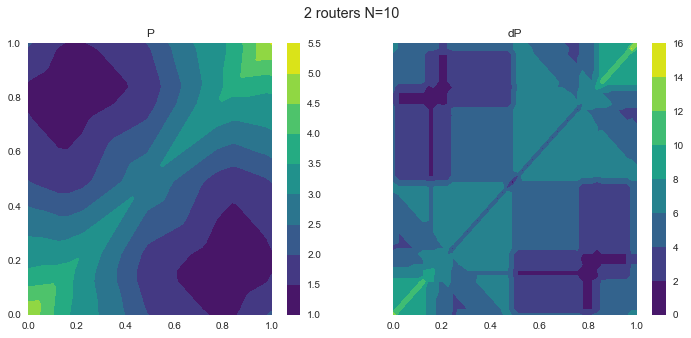

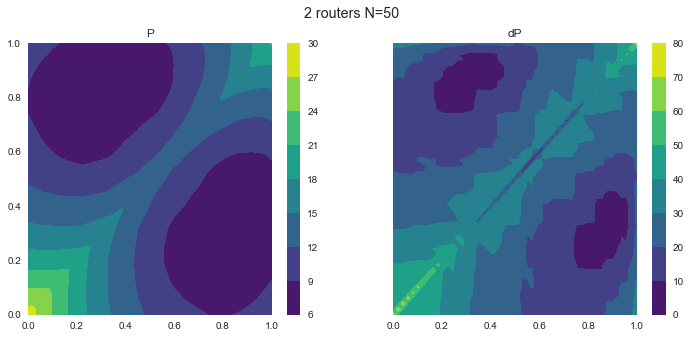

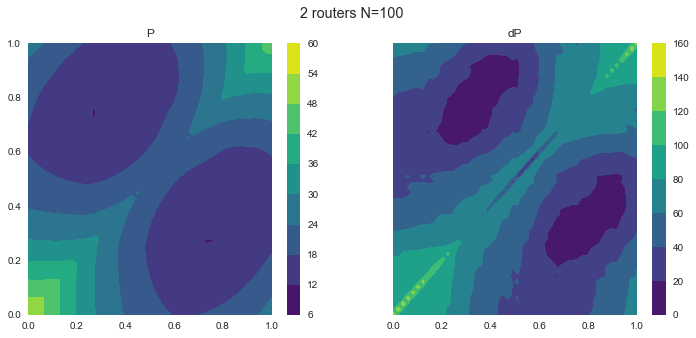

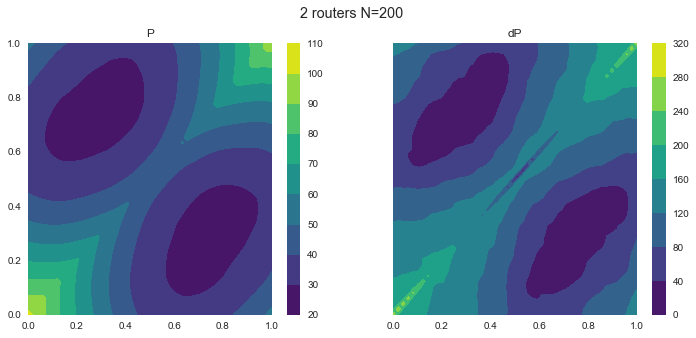

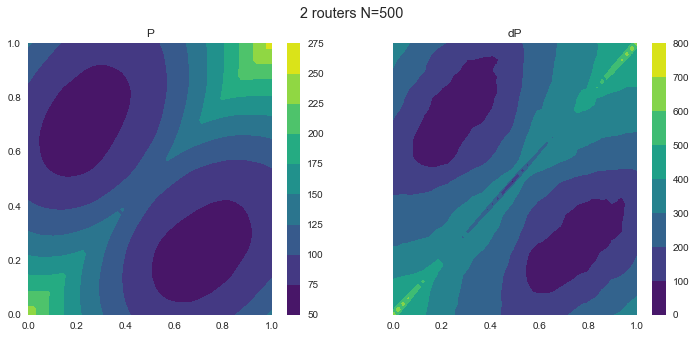

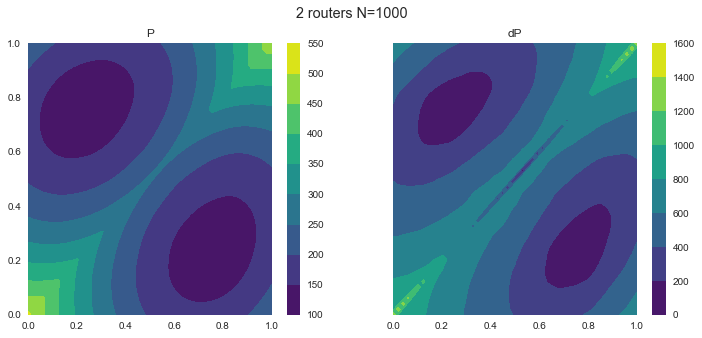

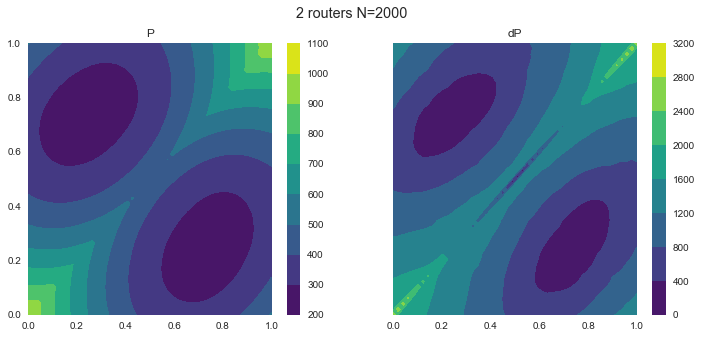

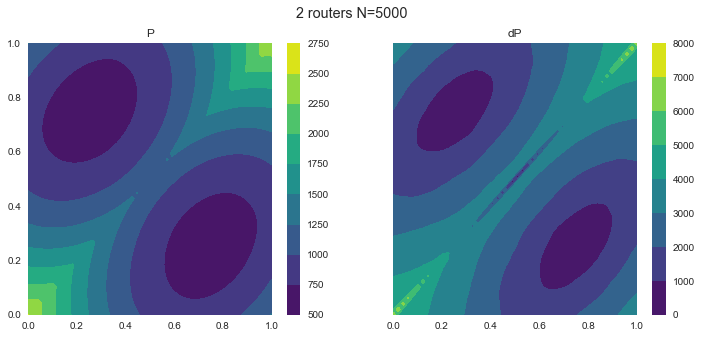

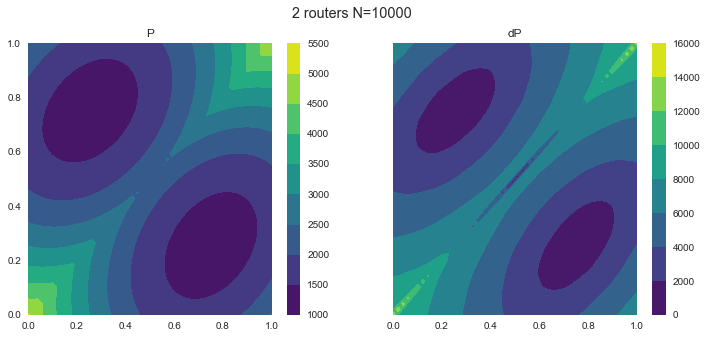

In [254]:
N = [10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
l = 1

p = np.zeros([w1.shape[0], w1.shape[0]])
dp = np.zeros([w1.shape[0], w1.shape[0]])
w1 = np.linspace(0,l)
w2 = np.linspace(0,l)

for n in N:
    x = np.random.rand(n)*l
    p = np.array([ np.array([P(w1_, w2_, x) for w2_ in w2]) for w1_ in w1]) 
    dp = np.array( [ np.array([np.linalg.norm(dP(w1_, w2_, x)) for w2_ in w2]) for w1_ in w1])
    print_colorbar(w1,w2,p,dp,n)

__Анализ:__
_Наблюдение показало, что при увеличении числа домиков линии уровня функций $P$ и $dP$ сглаживаются._

## Задача 13 (4)
Напишите функцию `gradient_descent`, которая возвращает всю оптимизационную траекторию $(w_k)$ через фиксированное число шагов и рисует процесс на графиках $P$ и $\nabla P$, что были выше (анимацию).

In [290]:
import sys

In [316]:
def gradient_descent(P, dP, w0, args=(), mu=0.01, Nsteps=10):
    w_ar = np.zeros ((Nsteps, 2),dtype=float)
    dp_ar = np.zeros ((Nsteps, 2), dtype=float)
    #print (w_ar)
    #print (dp_ar)

    w_ar[0,:] = w0.copy()
    w = w0.copy()
    #print ('\rw_1: %f, w_2: %f, dw: %f, it: %d' % (w_ar[0,0], w_ar[0,1], np.linalg.norm(dp_ar[0,:]), 0))
    #print ("mu",mu)
    for i in range(1,Nsteps):
        w = w - mu*dP(w[0], w[1], *args)
        w_ar[i,:] = w.copy()
        dp_ar[i,:] = dP(w[0], w[1], *args).copy()
       # print ('\rw_1: %f, w_2: %f, dw: %f, it: %d' % (w_ar[i,0], w_ar[i,1], np.linalg.norm(dp_ar[i,:]), i))
        
    return w_ar, dp_ar

## Задача 14 (4)
Напишите функцию `stochastic_gradient_descent`, которая возвращает всю оптимизационную траекторию $(w_k)$ метода стохастического градиентного спуска через фиксированное число шагов и рисует процесс на графиках $P$ и $\nabla P$, что были выше (анимацию).

In [267]:
def dP_sigma(w, x, p=0.5):
    random_mask = np.random.binomial(1, p, x.shape)
    y1 = (w[0]-x)*random_mask
    y2 = (w[1]-x)*random_mask

    y1_abs = np.abs(y1)
    y2_abs = np.abs(y2)   
    
    dp_dw1 = np.sum(np.sign(y1[y1_abs <= y2_abs]))
    dp_dw2 = np.sum(np.sign(y2[y2_abs <= y1_abs]))
    return np.array([dp_dw1, dp_dw2])

In [307]:
def stochastic_gradient_descent(P, dP_sigma, w0, args=(), mu=0.01, Nsteps=10):
    w_ar = np.zeros ((Nsteps, 2), dtype=float)
    dp_ar = np.zeros ((Nsteps, 2), dtype=float)
    w_ar[0,:] = w0
    w = w0
    for i in range(1,Nsteps):
        w = w - mu*dP_sigma(w, *args)
        w_ar[i,:] = w
        dp_ar[i,:] = dP_sigma(w, *args)
    return w_ar, dp_ar

Теперь анимация

GD: P = 1250.7, w1 = 0.26155, w2 = 0.76725
SGD: P = 1273.03, w1 = 0.22035, w2 = 0.71665


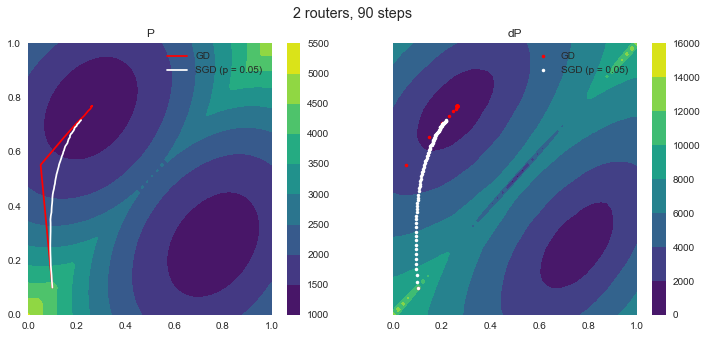

In [320]:
from matplotlib.animation import FuncAnimation
plt.rcParams["animation.html"] = "html5"
plt.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg\\bin\\ffmpeg.exe'


nsteps = 90
mu = 5e-5

w1_0 = 0.1 - 1e-4
w2_0 = 0.1
prob = 0.05
N = 1000
l = 1

w1 = np.linspace(0,l)
w2 = np.linspace(0,l)

x = np.random.rand(n)*l
p = np.array([ np.array([P(w1_, w2_, x) for w2_ in w2]) for w1_ in w1]) 
dp = np.array( [ np.array([np.linalg.norm(dP(w1_, w2_, x)) for w2_ in w2]) for w1_ in w1])
#print_colorbar(w1,w2,p,dp,n)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
c1 = ax1.contourf(w1, w2, p, cmap="viridis")
plt.colorbar(c1, ax = ax1)
ax1.set_title('P')
c2 = ax2.contourf(w1, w2, dp, cmap="viridis")
plt.colorbar(c2, ax = ax2)
ax2.set_title('dP')
f.set_size_inches(12, 5)
f.suptitle('2 routers N=%d'%(N))

ws, ds = gradient_descent(P, dP, np.array([w1_0, w2_0]) , args=(x,), mu=mu, Nsteps=nsteps)
print('GD: P = %g, w1 = %g, w2 = %g' % (P(ws[-1, 0], ws[-1, 1], x), 
                                        ws[-1, 0], ws[-1, 1]))
traj1, = ax1.plot([], [], 'r', animated=True, label='GD')
traj2, = ax2.plot([], [], 'r.', animated=True, label='GD')


from functools import partial

dP_sigma_binded = partial(dP_sigma, p=prob)

ws_stoch, ds_stoch = stochastic_gradient_descent(P, dP_sigma, np.array([w1_0, w2_0]), args=(x,prob ), mu=mu, Nsteps=nsteps)

print('SGD: P = %g, w1 = %g, w2 = %g' % (P(ws_stoch[-1, 0], ws_stoch[-1, 1], x), 
                                         ws_stoch[-1, 0], ws_stoch[-1, 1]))
traj1_stoch, = ax1.plot([], [], 'w', animated=True, label=f'SGD (p = {prob})')
traj2_stoch, = ax2.plot([], [], 'w.', animated=True, label=f'SGD (p = {prob})')

ax1.legend()
ax2.legend()

def init():
    return traj1, traj2, traj1_stoch, traj2_stoch 

def update(frame):
    traj1.set_data(ws[:frame, 0], ws[:frame, 1])
    traj2.set_data(ws[:frame, 0], ws[:frame, 1])
    traj1_stoch.set_data(ws_stoch[:frame, 0], ws_stoch[:frame, 1])
    traj2_stoch.set_data(ws_stoch[:frame, 0], ws_stoch[:frame, 1])
    return traj1, traj2, traj1_stoch, traj2_stoch

f.set_size_inches(12, 5)
f.suptitle(f'2 routers, {nsteps} steps')

FuncAnimation(f, update, frames=range(nsteps), interval=120,
                    init_func=init, blit=True)

## Задача 15 (4)
На практике Вам не так часто нужно будет писать свой собстенный алгоритм оптимизации. Решите поставленную выше задачу (2 станции, роскомнадзоровская норма) любым алгоритмом оптимизации из любой библиотеки Python. (cvxpy, scipy и т.д.)
Нарисуйте такие же анимашки.

In [ ]:
from matplotlib.animation import FuncAnimation
plt.rcParams["animation.html"] = "html5"
plt.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg\\bin\\ffmpeg.exe'
from scipy.optimize import minimize
    
def P_opt(w, x):
    return P(w[0], w[1], x)

def dP_opt(w, x):
    return dP(w[0], w[1], x)

nsteps = 90
method='L-BFGS-B'
mu = 5e-5
w1_0 = 0.1
w2_0 = 0.2
N = 1000
l = 1
x = np.random.rand(N)*l

w1 = np.linspace(0,l)
w2 = np.linspace(0,l)

x = np.random.rand(n)*l
p = np.array([ np.array([P(w1_, w2_, x) for w2_ in w2]) for w1_ in w1]) 
dp = np.array( [ np.array([np.linalg.norm(dP(w1_, w2_, x)) for w2_ in w2]) for w1_ in w1])
#print_colorbar(w1,w2,p,dp,n)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
c1 = ax1.contourf(w1, w2, p, cmap="viridis")
plt.colorbar(c1, ax = ax1)
ax1.set_title('P')
c2 = ax2.contourf(w1, w2, dp, cmap="viridis")
plt.colorbar(c2, ax = ax2)
ax2.set_title('dP')

ws, ds = gradient_descent(P, dP, np.array([w1_0, w2_0]) , args=(x,), mu=mu, Nsteps=nsteps)
print('GD: P = %g, w1 = %g, w2 = %g' % (P(ws[-1, 0], ws[-1, 1], x), 
                                        ws[-1, 0], ws[-1, 1]))
traj1, = ax1.plot([], [], 'r', animated=True, label='GD')
traj2, = ax2.plot([], [], 'r.', animated=True, label='GD')

w0 = np.array([w1_0, w2_0])
ws_opt = [w0]

def cb(w):
    ws_opt.append(w.copy())
res = minimize(P_opt, w0, args=(x,), method=method, 
               jac=dP_opt, callback=cb, options={'disp':True, 'maxiter':nsteps})

ws_opt = np.array(ws_opt)
print(f'{method}: P = %g, w1 = %g, w2 = %g (%d interations, P called %d times)' % 
      (res.fun, res.x[0], res.x[1], res.nit, res.nfev))

ax1.plot(ws_opt[-1, 0], ws_opt[-1, 1], 'y*', ms=15)
ax2.plot(ws_opt[-1, 0], ws_opt[-1, 1], 'y*', ms=15)

traj1_stoh, = ax1.plot([], [], 'w', animated=True, label=f'{method}')
traj2_stoh, = ax2.plot([], [], 'w.', animated=True, label=f'{method}')

ax1.legend()
ax2.legend()

def init():
    return traj1, traj2, traj1_stoh, traj2_stoh 

def update(frame):
    traj1.set_data(ws[:frame, 0], ws[:frame, 1])
    traj2.set_data(ws[:frame, 0], ws[:frame, 1])
    traj1_stoh.set_data(ws_opt[:frame, 0], ws_opt[:frame, 1])
    traj2_stoh.set_data(ws_opt[:frame, 0], ws_opt[:frame, 1])
    return traj1, traj2, traj1_stoh, traj2_stoh

f.set_size_inches(12, 5)
f.suptitle(f'2 routers, {nsteps} steps max')

FuncAnimation(f, update, frames=range(nsteps), interval=300,
                    init_func=init, blit=True)



GD: P = 1246.96, w1 = 0.24305, w2 = 0.74885
L-BFGS-B: P = 1246.96, w1 = 0.243139, w2 = 0.748767 (12 interations, P called 21 times)


Одномерная деревня научилась решать свои проблемы при любом числе и раположении жителей в мгновение ока. Улучшив качество интернета, хоббитцы смотрели онлайн-курсы и мемесы и жили припеваючи. Как Вы могли догадаться, роскомнадзору это не очень по душе. Вот тут то они выкатили новое требование о том, что дата-центры (роутеры) должны стоять не более, чем на расстоянии половины деревни друг от друга, чтобы силовым структурам было легче собирать информацию о том, как используют интернет жители деревни Одномерново.

$$
\left|w_1 - w_2\right| \leq \dfrac{l}{2}
$$

## Задача 16 (2)
Нарисуйте на плоскости допустимое множество решений. Выпукло ли оно?

## Задача 17 (4)
Напишите функцию `conditional_SGD`, которая возвращает всю оптимизационную траекторию $(w_k)$ метода условного стохастического градиентного спуска через фиксированное число шагов и рисует процесс на графиках $P$ и $\nabla P$, что были выше (анимацию).

Метод условного градиентного спуска заключается в том, чтобы делать градиентный шаг, а после этого проверять принадлежность полученной точки целевому множеству. Если она ему принадлежит, то алгоритм продолжается, иначе делается ортогональная проекция на целевое множество.

In [ ]:
def conditional_SGD(P, dP_sigma, w0, mu, Nsteps):
    
    return trajectory

## Задача 18 (5)
Напишите функцию `multi_newton`, которая реализует решение двумерной задачи с $p(d) = d^3$ методом Ньютона и возвращает траекторию работы алгоритма. Сравните результаты для данной задачи с методом стохастического градиентного спуска.

In [ ]:
def multi_newton(P, dP, ddP, w0, Nsteps):
    w = w0
    w_ = []
    for i in range(Nsteps):
        w_.append(w)
        w -= dP(w, x)/ddP(w,x)
    w_.append(w)
    return w_

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read() #or edit path to custom.css
    return HTML(styles)
css_styling()